<a href="https://colab.research.google.com/github/Arefe-Ehyaee/ML-based-PCF-SPR-sensor/blob/main/PCF_SPR_Scenario2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


In [ ]:
%cd /content/MyDrive/MyDrive/Sensor/'Adding more features'/normal_output
%ls

/content/MyDrive/MyDrive/Sensor/Adding more features/normal_output
 alldata.csv                               'ii6mg  final sixth66   regressor .png'
 i2_mse.png                                'ii6mg loss.png'
 i2.png                                    'ii6mg Loss-Train-Validation-MSE.png'
 i2_regressor.png                          'ii6mg sa.png'
 i5-Loss-Train-Validation-MSE.png          'ii6mg too final4 sa.png'
'i5mg last loss.png'                        ima_neff_delete/
'i5mg last SA.png'                          newalldata.csv
 i5-vs.png                                 'new fifth55 prediction regressor line.png'
'i6mg  final sixth66   regressor .png'     'new fifth55 Prediction test data split.png'
'i6mg loss.png'                             normal_output_curve.ipynb
'i6mg Loss-Train-Validation-MSE.png'        normal_output.ipynb
'i6mg new Prediction test data split.png'   normal_output_na_cureves.ipynb
'i6mg sa.png'                               normal_output_split_RG.ipynb
'i6mg

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
import tensorflow as tf
from tensorflow import keras
import os

# **Load Files**

In [ ]:
path = '/content/MyDrive/MyDrive/Sensor/Adding more features/normal_output'
file_path = os.path.join(path, 'newalldata.csv')
print(file_path)
with open(file_path, 'rb') as f:
  all_data_df = pd.read_csv(f)

/content/MyDrive/MyDrive/Sensor/Adding more features/normal_output/newalldata.csv


In [ ]:
all_data_df

,w,na,neff,re(neff),imag(neff),loss,SA(1/RIU),rg(um)
0,0.60,1.31,1.4519323887669042-3.291653714847547E-6i,1.451932,0.000003,3.056809,4.515266,0.3
1,0.62,1.31,1.45091066181998-3.408409361911753E-6i,1.450911,0.000003,3.063131,-12.868908,0.3
2,0.64,1.31,1.4499279284661912-4.654727785503613E-6i,1.449928,0.000005,4.052470,19.683089,0.3
3,0.66,1.31,1.4489779158457035-8.768782197488685E-6i,1.448978,0.000009,7.402882,36.599197,0.3
4,0.68,1.31,1.4480534509365457-2.0683030246449427E-5i,1.448053,0.000021,16.947698,48.733377,0.3
...,...,...,...,...,...,...,...,...
1635,1.32,1.40,1.4232016486184051-4.3126278368817394E-4i,1.423202,0.000431,182.042803,NaN,0.6
1636,1.34,1.40,1.4223850839449483-4.260361546667449E-4i,1.422385,0.000426,177.152433,NaN,0.6
1637,1.36,1.40,1.4215653275687616-4.321107403804846E-4i,1.421565,0.000432,177.036011,NaN,0.6
1638,1.38,1.40,1.4207395188406247-4.471151340129109E-4i,1.420740,0.000447,180.528489,NaN,0.6


In [ ]:
del all_data_df['imag(neff)']

In [ ]:
all_data_df

,w,na,neff,re(neff),loss,SA(1/RIU),rg(um)
0,0.60,1.31,1.4519323887669042-3.291653714847547E-6i,1.451932,3.056809,4.515266,0.3
1,0.62,1.31,1.45091066181998-3.408409361911753E-6i,1.450911,3.063131,-12.868908,0.3
2,0.64,1.31,1.4499279284661912-4.654727785503613E-6i,1.449928,4.052470,19.683089,0.3
3,0.66,1.31,1.4489779158457035-8.768782197488685E-6i,1.448978,7.402882,36.599197,0.3
4,0.68,1.31,1.4480534509365457-2.0683030246449427E-5i,1.448053,16.947698,48.733377,0.3
...,...,...,...,...,...,...,...
1635,1.32,1.40,1.4232016486184051-4.3126278368817394E-4i,1.423202,182.042803,NaN,0.6
1636,1.34,1.40,1.4223850839449483-4.260361546667449E-4i,1.422385,177.152433,NaN,0.6
1637,1.36,1.40,1.4215653275687616-4.321107403804846E-4i,1.421565,177.036011,NaN,0.6
1638,1.38,1.40,1.4207395188406247-4.471151340129109E-4i,1.420740,180.528489,NaN,0.6


In [ ]:
newdf = all_data_df.copy()
newdf['loss_log'] = np.log(newdf['loss'])
newdf['SA(1/RIU)_new_log'] = np.log(newdf['SA(1/RIU)'] + 1000)

newdf['w^2'] = newdf['w'] * newdf['w']
newdf['na ^2'] = newdf['na '] * newdf['na ']
newdf['rg(um)^2'] = newdf['rg(um)'] * newdf['rg(um)']
#------------------------------------------------------------------
newdf['w^3'] = pow(newdf['w'],3)
newdf['na ^3'] = pow(newdf['na '],3)
newdf['rg(um)^3'] = pow(newdf['rg(um)'],3)
#-----------------------------------------------------------------
newdf['w^4'] = pow(newdf['w'],4)
newdf['na ^4'] = pow(newdf['na '],4)
newdf['rg(um)^4'] = pow(newdf['rg(um)'],4)

In [ ]:
newdf

,w,na,neff,re(neff),loss,SA(1/RIU),rg(um),loss_log,SA(1/RIU)_new_log,w^2,na ^2,rg(um)^2,w^3,na ^3,rg(um)^3,w^4,na ^4,rg(um)^4
0,0.60,1.31,1.4519323887669042-3.291653714847547E-6i,1.451932,3.056809,4.515266,0.3,1.117372,6.912260,0.3600,1.7161,0.09,0.216000,2.248091,0.027,0.129600,2.944999,0.0081
1,0.62,1.31,1.45091066181998-3.408409361911753E-6i,1.450911,3.063131,-12.868908,0.3,1.119437,6.894803,0.3844,1.7161,0.09,0.238328,2.248091,0.027,0.147763,2.944999,0.0081
2,0.64,1.31,1.4499279284661912-4.654727785503613E-6i,1.449928,4.052470,19.683089,0.3,1.399326,6.927247,0.4096,1.7161,0.09,0.262144,2.248091,0.027,0.167772,2.944999,0.0081
3,0.66,1.31,1.4489779158457035-8.768782197488685E-6i,1.448978,7.402882,36.599197,0.3,2.001869,6.943701,0.4356,1.7161,0.09,0.287496,2.248091,0.027,0.189747,2.944999,0.0081
4,0.68,1.31,1.4480534509365457-2.0683030246449427E-5i,1.448053,16.947698,48.733377,0.3,2.830132,6.955338,0.4624,1.7161,0.09,0.314432,2.248091,0.027,0.213814,2.944999,0.0081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,1.32,1.40,1.4232016486184051-4.3126278368817394E-4i,1.423202,182.042803,NaN,0.6,5.204242,NaN,1.7424,1.9600,0.36,2.299968,2.744000,0.216,3.035958,3.841600,0.1296
1636,1.34,1.40,1.4223850839449483-4.260361546667449E-4i,1.422385,177.152433,NaN,0.6,5.177011,NaN,1.7956,1.9600,0.36,2.406104,2.744000,0.216,3.224179,3.841600,0.1296
1637,1.36,1.40,1.4215653275687616-4.321107403804846E-4i,1.421565,177.036011,NaN,0.6,5.176353,NaN,1.8496,1.9600,0.36,2.515456,2.744000,0.216,3.421020,3.841600,0.1296
1638,1.38,1.40,1.4207395188406247-4.471151340129109E-4i,1.420740,180.528489,NaN,0.6,5.195889,NaN,1.9044,1.9600,0.36,2.628072,2.744000,0.216,3.626739,3.841600,0.1296


In [ ]:
newdf.isnull().sum()

w                      0
na                     0
neff                   0
re(neff)               0
loss                   0
SA(1/RIU)            164
rg(um)                 0
loss_log               0
SA(1/RIU)_new_log    164
w^2                    0
na ^2                  0
rg(um)^2               0
w^3                    0
na ^3                  0
rg(um)^3               0
w^4                    0
na ^4                  0
rg(um)^4               0
dtype: int64

In [ ]:
newdf = newdf.dropna(axis = 0)
newdf.isnull().sum()

w                    0
na                   0
neff                 0
re(neff)             0
loss                 0
SA(1/RIU)            0
rg(um)               0
loss_log             0
SA(1/RIU)_new_log    0
w^2                  0
na ^2                0
rg(um)^2             0
w^3                  0
na ^3                0
rg(um)^3             0
w^4                  0
na ^4                0
rg(um)^4             0
dtype: int64

In [ ]:
newdf['rg(um)'].value_counts()

0.3    369
0.4    369
0.5    369
0.6    369
Name: rg(um), dtype: int64

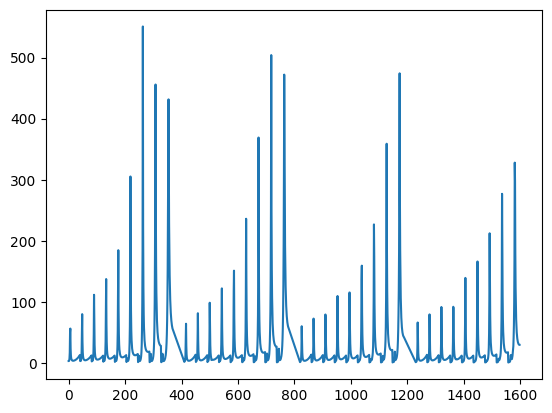

In [ ]:
plt.plot(newdf['loss'])

In [ ]:
newdf[newdf.columns[1]]

0       1.31
1       1.31
2       1.31
3       1.31
4       1.31
        ... 
1594    1.39
1595    1.39
1596    1.39
1597    1.39
1598    1.39
Name: na , Length: 1476, dtype: float64

In [ ]:
na_selection = newdf['na '] == 1.31
rg_selection = newdf['rg(um)'] == 0.4

df_131_4 = newdf.loc[na_selection & rg_selection]

**complite curve**

In [ ]:
na_list = [1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39]

na_data_dict = dict()
for na in na_list:
    name = 'na =' + str(na)
    print(name)

    na_selection = newdf['na '] == na

    na_data_dict[name] = newdf.loc[na_selection]

    data = newdf.loc[na_selection].copy()
    data['loss_Q'] = data['loss'] / data['loss'].abs().max()
    data['SA(1/RIU)_Q'] = data['SA(1/RIU)'] / data['SA(1/RIU)'].abs().max()

    na_data_dict[name] = data

na =1.31
na =1.32
na =1.33
na =1.34
na =1.35
na =1.36
na =1.37
na =1.38
na =1.39


In [ ]:
na_data_dict['na =1.31']

,w,na,neff,re(neff),loss,SA(1/RIU),rg(um),loss_log,SA(1/RIU)_new_log,w^2,na ^2,rg(um)^2,w^3,na ^3,rg(um)^3,w^4,na ^4,rg(um)^4,loss_Q,SA(1/RIU)_Q
0,0.60,1.31,1.4519323887669042-3.291653714847547E-6i,1.451932,3.056809,4.515266,0.3,1.117372,6.912260,0.3600,1.7161,0.09,0.216000,2.248091,0.027,0.129600,2.944999,0.0081,0.046232,0.018873
1,0.62,1.31,1.45091066181998-3.408409361911753E-6i,1.450911,3.063131,-12.868908,0.3,1.119437,6.894803,0.3844,1.7161,0.09,0.238328,2.248091,0.027,0.147763,2.944999,0.0081,0.046328,-0.053790
2,0.64,1.31,1.4499279284661912-4.654727785503613E-6i,1.449928,4.052470,19.683089,0.3,1.399326,6.927247,0.4096,1.7161,0.09,0.262144,2.248091,0.027,0.167772,2.944999,0.0081,0.061291,0.082272
3,0.66,1.31,1.4489779158457035-8.768782197488685E-6i,1.448978,7.402882,36.599197,0.3,2.001869,6.943701,0.4356,1.7161,0.09,0.287496,2.248091,0.027,0.189747,2.944999,0.0081,0.111964,0.152978
4,0.68,1.31,1.4480534509365457-2.0683030246449427E-5i,1.448053,16.947698,48.733377,0.3,2.830132,6.955338,0.4624,1.7161,0.09,0.314432,2.248091,0.027,0.213814,2.944999,0.0081,0.256324,0.203697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,1.32,1.31,1.4226148503435-2.4199566519839957E-5i,1.422615,10.215018,3.774594,0.6,2.323859,6.911523,1.7424,1.7161,0.36,2.299968,2.248091,0.216,3.035958,2.944999,0.1296,0.154496,0.015777
1267,1.34,1.31,1.4218050763818868-2.626032349788343E-5i,1.421805,10.919449,4.108967,0.6,2.390546,6.911856,1.7956,1.7161,0.36,2.406104,2.248091,0.216,3.224179,2.944999,0.1296,0.165150,0.017175
1268,1.36,1.31,1.4209919929729808-2.8473959866967532E-5i,1.420992,11.665797,4.420408,0.6,2.456661,6.912166,1.8496,1.7161,0.36,2.515456,2.248091,0.216,3.421020,2.944999,0.1296,0.176438,0.018476
1269,1.38,1.31,1.4201755292596179-3.0848013648711576E-5i,1.420176,12.455282,4.711100,0.6,2.522145,6.912455,1.9044,1.7161,0.36,2.628072,2.248091,0.216,3.626739,2.944999,0.1296,0.188379,0.019692


<Axes: >

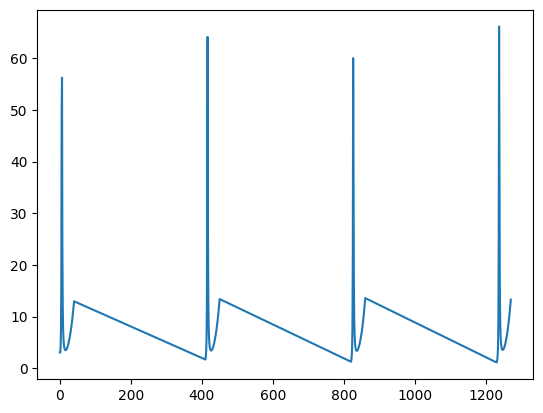

In [ ]:
na_data_dict['na =1.31']['loss'].plot()

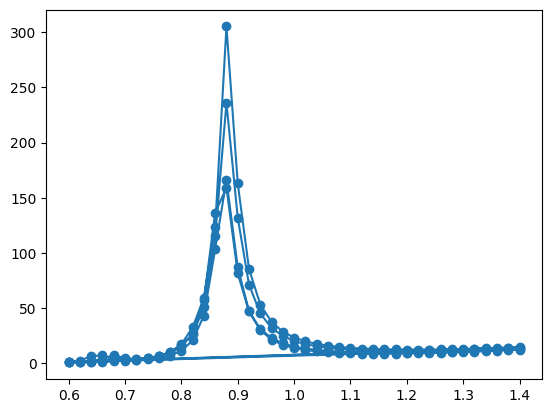

In [ ]:
plt.plot(na_data_dict[list(na_data_dict.keys())[5]]['w'], na_data_dict[list(na_data_dict.keys())[5]]['loss'], '-o')

In [ ]:
na_data_dict.keys()

dict_keys(['na =1.31', 'na =1.32', 'na =1.33', 'na =1.34', 'na =1.35', 'na =1.36', 'na =1.37', 'na =1.38', 'na =1.39'])

In [ ]:
len(na_data_dict.keys())

9

# **Split rg**

In [ ]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()

rg = 0.4

for key in na_data_dict.keys():
  rg_selection = na_data_dict[key]['rg(um)'] == rg

  test_df = test_df.append(na_data_dict[key].loc[rg_selection])
  train_df = train_df.append(na_data_dict[key].loc[np.logical_not(rg_selection)])

<ipython-input-22-064b427c6d66>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(na_data_dict[key].loc[rg_selection])
<ipython-input-22-064b427c6d66>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(na_data_dict[key].loc[np.logical_not(rg_selection)])
<ipython-input-22-064b427c6d66>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(na_data_dict[key].loc[rg_selection])
<ipython-input-22-064b427c6d66>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(na_data_dict[key].loc[np.logical_not(rg_selection)])
<ipython-input-22-064b427c6d66>:9:

In [ ]:
train_df

,w,na,neff,re(neff),loss,SA(1/RIU),rg(um),loss_log,SA(1/RIU)_new_log,w^2,na ^2,rg(um)^2,w^3,na ^3,rg(um)^3,w^4,na ^4,rg(um)^4,loss_Q,SA(1/RIU)_Q
0,0.60,1.31,1.4519323887669042-3.291653714847547E-6i,1.451932,3.056809,4.515266,0.3,1.117372,6.912260,0.3600,1.7161,0.09,0.216000,2.248091,0.027,0.129600,2.944999,0.0081,0.046232,0.018873
1,0.62,1.31,1.45091066181998-3.408409361911753E-6i,1.450911,3.063131,-12.868908,0.3,1.119437,6.894803,0.3844,1.7161,0.09,0.238328,2.248091,0.027,0.147763,2.944999,0.0081,0.046328,-0.053790
2,0.64,1.31,1.4499279284661912-4.654727785503613E-6i,1.449928,4.052470,19.683089,0.3,1.399326,6.927247,0.4096,1.7161,0.09,0.262144,2.248091,0.027,0.167772,2.944999,0.0081,0.061291,0.082272
3,0.66,1.31,1.4489779158457035-8.768782197488685E-6i,1.448978,7.402882,36.599197,0.3,2.001869,6.943701,0.4356,1.7161,0.09,0.287496,2.248091,0.027,0.189747,2.944999,0.0081,0.111964,0.152978
4,0.68,1.31,1.4480534509365457-2.0683030246449427E-5i,1.448053,16.947698,48.733377,0.3,2.830132,6.955338,0.4624,1.7161,0.09,0.314432,2.248091,0.027,0.213814,2.944999,0.0081,0.256324,0.203697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.32,1.39,1.4229503202450096-7.410097895945923E-5i,1.422950,31.279188,-481.993369,0.6,3.442953,6.249988,1.7424,1.9321,0.36,2.299968,2.685619,0.216,3.035958,3.733010,0.1296,0.065973,-0.551724
1595,1.34,1.39,1.4221526626172099-7.32035883551411E-5i,1.422153,30.439186,-481.988075,0.6,3.415731,6.249998,1.7956,1.9321,0.36,2.406104,2.685619,0.216,3.224179,3.733010,0.1296,0.064201,-0.551718
1596,1.36,1.39,1.4213535810163063-7.299525179100927E-5i,1.421354,29.906195,-491.971025,0.6,3.398066,6.230538,1.8496,1.9321,0.36,2.515456,2.685619,0.216,3.421020,3.733010,0.1296,0.063077,-0.563145
1597,1.38,1.39,1.4205530013982923-7.33873498248663E-5i,1.420553,29.631087,-509.253686,0.6,3.388824,6.195927,1.9044,1.9321,0.36,2.628072,2.685619,0.216,3.626739,3.733010,0.1296,0.062497,-0.582928


In [ ]:
test_df

,w,na,neff,re(neff),loss,SA(1/RIU),rg(um),loss_log,SA(1/RIU)_new_log,w^2,na ^2,rg(um)^2,w^3,na ^3,rg(um)^3,w^4,na ^4,rg(um)^4,loss_Q,SA(1/RIU)_Q
410,0.60,1.31,1.4519316734563534-1.8320348490397264E-6i,1.451932,1.700000,11.458506,0.4,0.530628,6.919149,0.3600,1.7161,0.16,0.216000,2.248091,0.064,0.129600,2.944999,0.0256,0.025711,0.047894
411,0.62,1.31,1.4509094232009478-2.5947930425369876E-6i,1.450909,2.330000,-2.563634,0.4,0.845868,6.905188,0.3844,1.7161,0.16,0.238328,2.248091,0.064,0.147763,2.944999,0.0256,0.035240,-0.010716
412,0.64,1.31,1.4499272905386937-3.718477602611476E-6i,1.449927,3.240000,14.196026,0.4,1.175573,6.921851,0.4096,1.7161,0.16,0.262144,2.248091,0.064,0.167772,2.944999,0.0256,0.049003,0.059337
413,0.66,1.31,1.4489780556013385-6.650448277199989E-6i,1.448978,5.610000,29.847845,0.4,1.724551,6.937166,0.4356,1.7161,0.16,0.287496,2.248091,0.064,0.189747,2.944999,0.0256,0.084848,0.124759
414,0.68,1.31,1.4480545576514687-1.5187655795435709E-5i,1.448055,12.400000,45.394705,0.4,2.517696,6.952150,0.4624,1.7161,0.16,0.314432,2.248091,0.064,0.213814,2.944999,0.0256,0.187543,0.189742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1.32,1.39,1.423353366801255-1.6800142147093634E-4i,1.423353,70.916042,-431.043441,0.4,4.261497,6.343804,1.7424,1.9321,0.16,2.299968,2.685619,0.064,3.035958,3.733010,0.0256,0.149573,-0.493403
775,1.34,1.39,1.4225607473794515-1.6034987269291314E-4i,1.422561,66.675961,-424.129089,0.4,4.199844,6.355884,1.7956,1.9321,0.16,2.406104,2.685619,0.064,3.224179,3.733010,0.0256,0.140630,-0.485489
776,1.36,1.39,1.4217689406829068-1.5479526134078758E-4i,1.421769,63.419705,-429.990079,0.4,4.149775,6.345654,1.8496,1.9321,0.16,2.515456,2.685619,0.064,3.421020,3.733010,0.0256,0.133762,-0.492198
777,1.38,1.39,1.4209776166728796-1.5090109144982614E-4i,1.420978,60.928257,-446.816416,0.4,4.109697,6.315690,1.9044,1.9321,0.16,2.628072,2.685619,0.064,3.626739,3.733010,0.0256,0.128508,-0.511458


<Axes: >

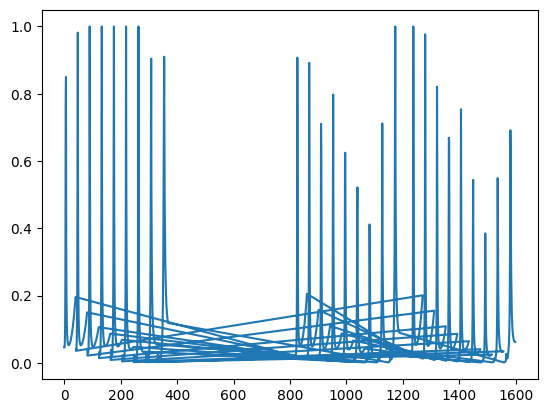

In [ ]:
train_df['loss_Q'].plot()

<Axes: >

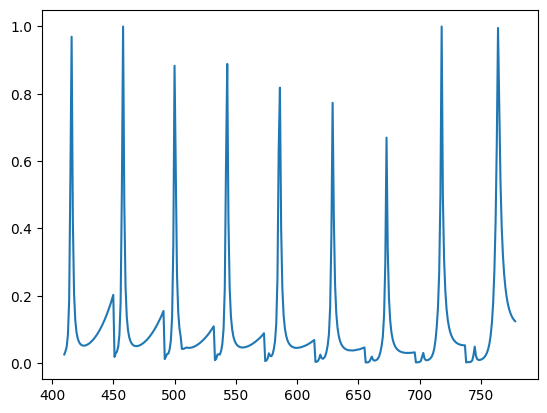

In [ ]:
test_df['loss_Q'].plot()

<Axes: >

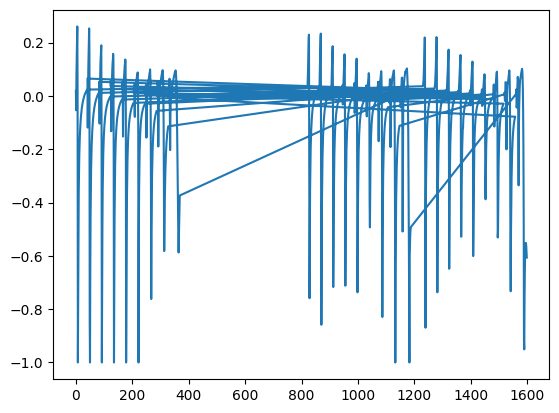

In [ ]:
train_df['SA(1/RIU)_Q'].plot()

<Axes: >

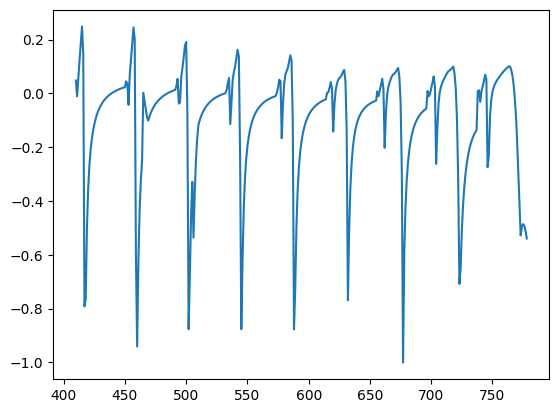

In [ ]:
test_df['SA(1/RIU)_Q'].plot()

In [ ]:
y = train_df[['loss_Q','SA(1/RIU)_Q']]
y_test = test_df[['loss_Q','SA(1/RIU)_Q']]

print(y.shape)
print(y_test.shape)

(1107, 2)
(369, 2)


In [ ]:
X = train_df[['w', 'na ','rg(um)','w^2','na ^2','rg(um)^2','w^3','na ^3','rg(um)^3', 'w^4', 'na ^4', 'rg(um)^4']]
X_test = test_df[['w', 'na ','rg(um)','w^2','na ^2','rg(um)^2','w^3','na ^3','rg(um)^3', 'w^4', 'na ^4', 'rg(um)^4']]

print(X.shape)
print(X_test.shape)

(1107, 12)
(369, 12)


In [ ]:
data_std = X.std()
data_mean = X.mean()

X = (X - data_mean) / data_std
X_test = (X_test - data_mean) / data_std

In [ ]:
n_cols = X.shape[1]
n_cols

12

In [ ]:
# define regression model
def regression_model(lr=0.00001):
    # create model
    #tf.keras.utils.set_random_seed(42)
    init = initializers.RandomNormal(stddev=0.1)
    biass = initializers.Zeros()
    model = Sequential()
    model.add(Dense(12, activation='relu', input_shape=(n_cols,), kernel_initializer=init , bias_initializer = biass))
    model.add(Dense(50, activation='relu', kernel_initializer=init , bias_initializer = biass))
    model.add(Dense(50, activation='relu', kernel_initializer=init , bias_initializer = biass))
    model.add(Dense(50, activation='relu', kernel_initializer=init , bias_initializer = biass))
    model.add(Dense(2, activation = 'linear', kernel_initializer=init , bias_initializer = biass))

    # compile model
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    metric = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
    #loss_log = tf.keras.losses.MeanSquaredLogarithmicError(reduction="auto", name="mean_squared_logarithmic_error")
    model.compile(optimizer=opt, loss=metric)
    return model

# **Split dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2 , shuffle= True)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(885, 12)
(885, 2)
(222, 12)
(222, 2)


In [ ]:
y_train

,loss_Q,SA(1/RIU)_Q
259,0.054089,0.070907
989,0.017979,-0.046521
829,0.144790,-0.508877
299,0.015482,0.044824
1329,0.047744,-0.115528
...,...,...
850,0.105400,0.006229
147,0.050002,-0.077966
1569,0.013486,-0.335511
1042,0.102118,-0.493241


In [ ]:
model = regression_model(0.0007)
# fit the model
import time
t0 = time.time()
history2 = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_data=(X_valid, y_valid))
print("seconds passed: ", time.time()-t0)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


89/89 [==============================] - 2s 5ms/step - loss: 0.0334 - val_loss: 0.0248
Epoch 2/1000
89/89 [==============================] - 0s 3ms/step - loss: 0.0310 - val_loss: 0.0239
Epoch 3/1000
89/89 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.0217
Epoch 4/1000
89/89 [==============================] - 0s 3ms/step - loss: 0.0268 - val_loss: 0.0208
Epoch 5/1000
89/89 [==============================] - 0s 3ms/step - loss: 0.0253 - val_loss: 0.0201
Epoch 6/1000
89/89 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.0180
Epoch 7/1000
89/89 [==============================] - 0s 2ms/step - loss: 0.0207 - val_loss: 0.0146
Epoch 8/1000
89/89 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.0129
Epoch 9/1000
89/89 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0100
Epoch 10/1000
89/89 [==============================] - 0s 3ms/step - loss: 0.0135 - val_loss: 0.0108
Epoch 11/100

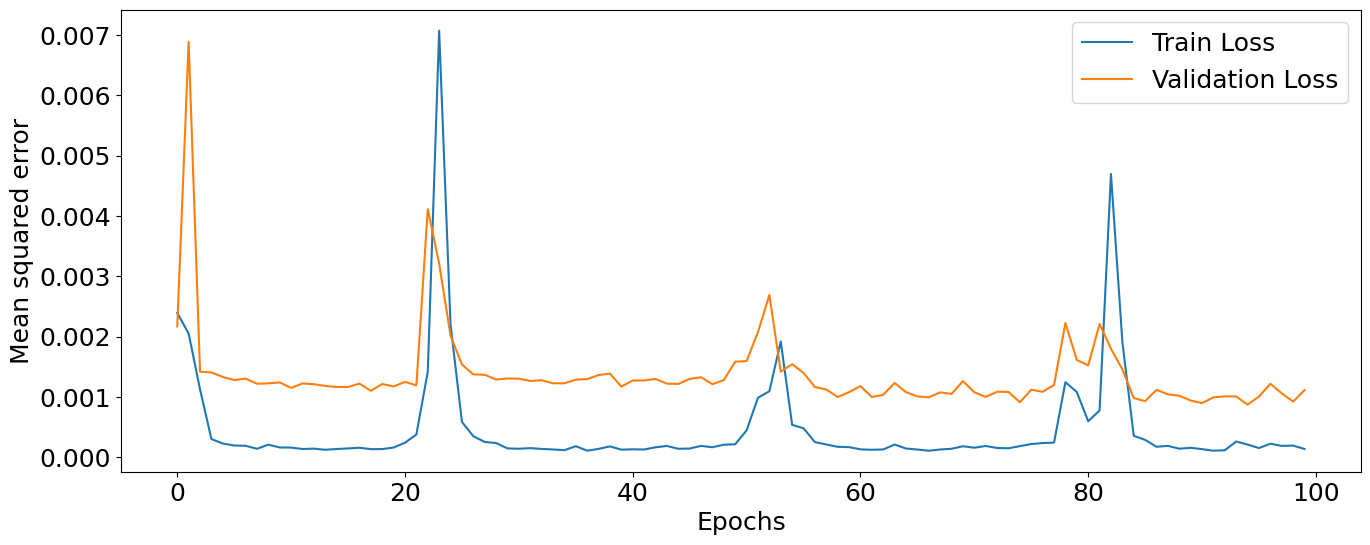

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(history2.history['loss'][900:1000])
plt.plot(history2.history['val_loss'][900:1000])
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
#plt.set_title('Train Loss',fontsize=18)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Mean squared error',fontsize=18)
plt.legend(['Train Loss', 'Validation Loss'], fontsize=18)

#ax[1].plot(history2.history['val_loss'][:1000])
#ax[1].tick_params(axis="x", labelsize=18)
#ax[1].tick_params(axis="y", labelsize=18)
#ax[1].set_title('Validation Loss',fontsize=18)
#ax[1].set_xlabel('Epochs',fontsize=18)
#ax[1].set_ylabel('Mean squared error (Loss)',fontsize=18)
#plt.savefig('ii6mg Loss-Train-Validation-MSE.png', format='png')

In [ ]:
# evaluation - keras / sklearn
eval = model.evaluate(X_test, y_test, batch_size=1)
eval

369/369 [==============================] - 1s 1ms/step - loss: 0.0020


0.0019570381846278906

In [ ]:
t1 = time.time()
y_predict_test = model.predict(X_test)
print("seconds passed: ", time.time()-t1)

12/12 [==============================] - 0s 2ms/step
seconds passed:  0.17933344841003418


In [ ]:
y_predict_test.shape

(369, 2)

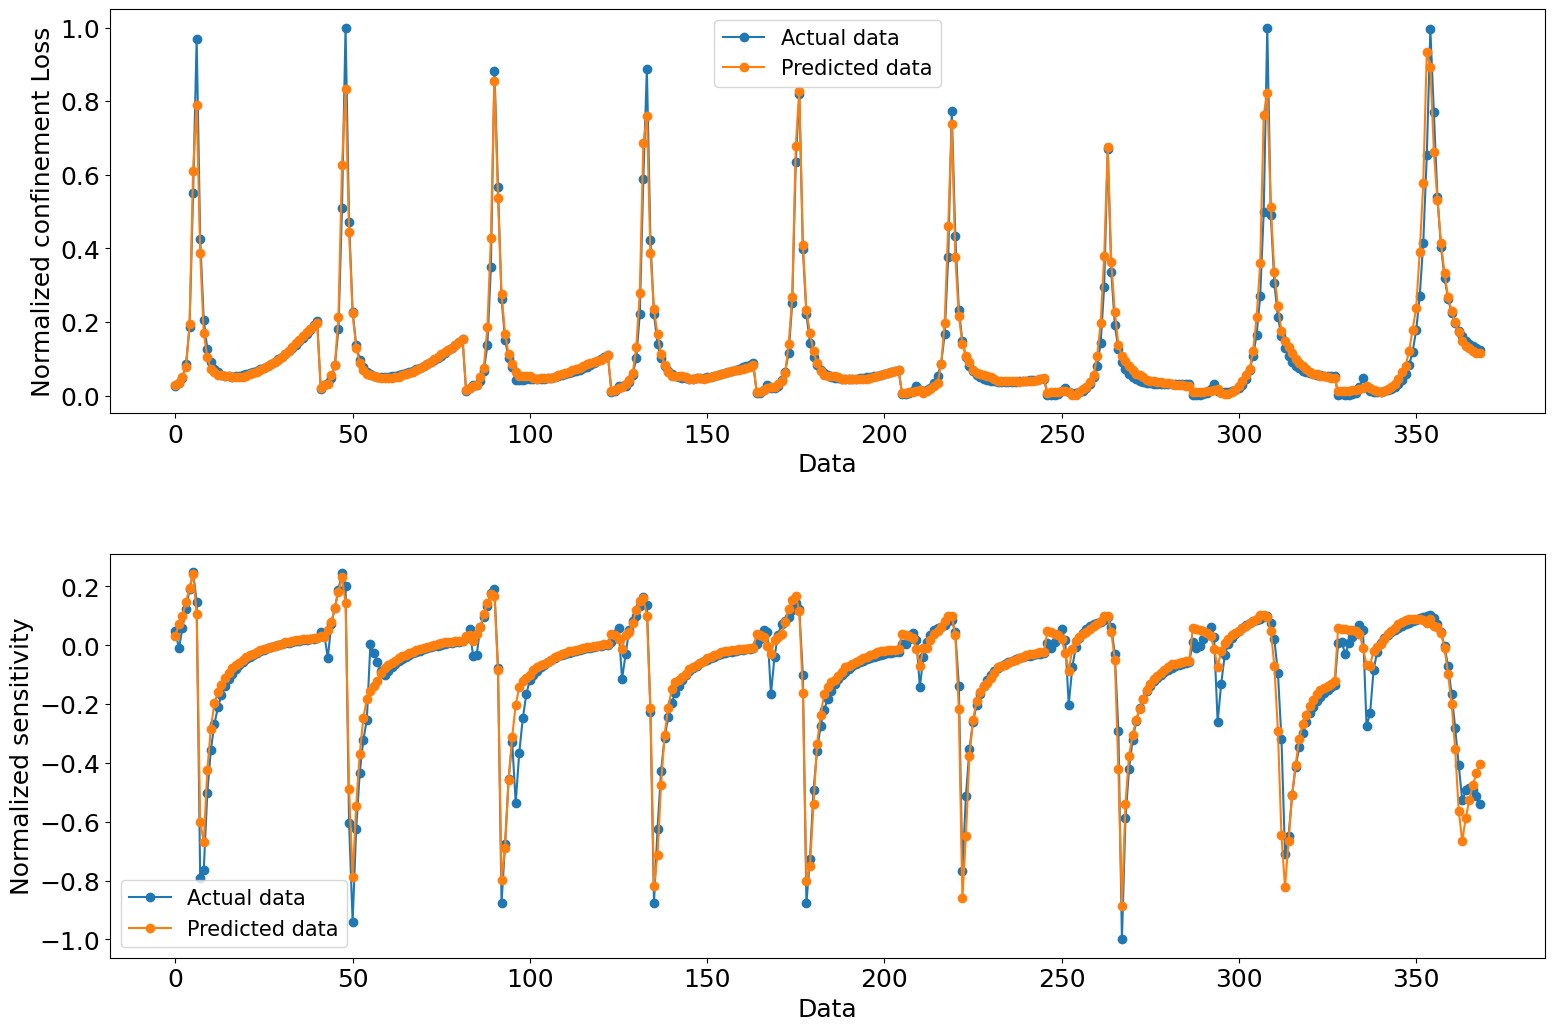

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(17,12))
fig.tight_layout(pad=8.0)

ax[0].tick_params(axis="x", labelsize=18)
ax[0].tick_params(axis="y", labelsize=18)
ax[0].plot(range(len(y_test['loss_Q'])), y_test['loss_Q'], '-o', label='Actual data')
ax[0].plot(range(len(y_test['loss_Q'])), y_predict_test[:,0], '-o', label='Predicted data')
ax[0].set_xlabel('Data',fontsize=18)
ax[0].set_ylabel('Normalized confinement Loss',fontsize=18)
ax[0].legend(prop={'size': 15})

ax[1].tick_params(axis="x", labelsize=18)
ax[1].tick_params(axis="y", labelsize=18)
ax[1].plot(range(len(y_test['SA(1/RIU)_Q'])), y_test['SA(1/RIU)_Q'], '-o', label='Actual data')
ax[1].plot(range(len(y_test['SA(1/RIU)_Q'])), y_predict_test[:,1], '-o', label='Predicted data')
ax[1].set_xlabel('Data',fontsize=18)
ax[1].set_ylabel('Normalized sensitivity',fontsize=18)
ax[1].legend(prop={'size': 15})
#fig.savefig('ii6mg new Prediction test data split.png', format='png')

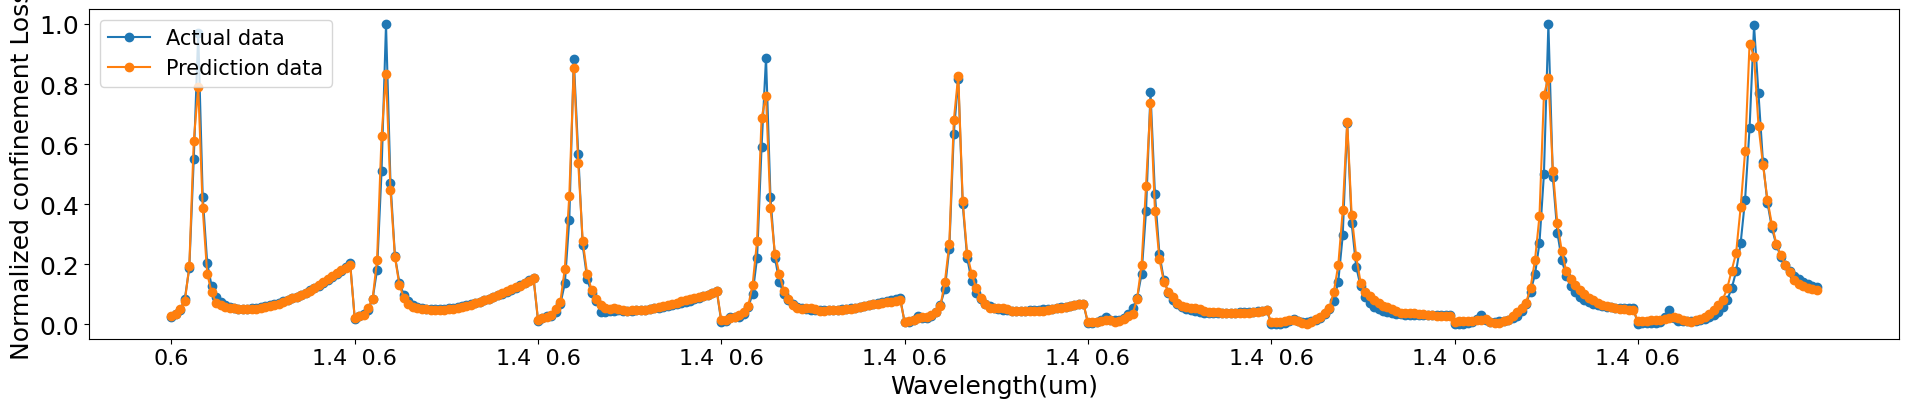

In [ ]:
new_x_labels = [0.6, '1.4  0.6' , '1.4  0.6',  '1.4  0.6', '1.4  0.6', '1.4  0.6', '1.4  0.6', '1.4  0.6', '1.4  0.6']

plt.figure(figsize=(20,5))

plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=18)
plt.plot(range(len(y_test['loss_Q'])), y_test['loss_Q'], '-o', label='Actual data')
plt.plot(range(len(y_test['loss_Q'])), y_predict_test[:,0], '-o', label='Prediction data')
plt.xlabel('Wavelength(um)',fontsize=18)
plt.ylabel('Normalized confinement Loss',fontsize=18)
plt.legend(prop={'size': 15})
plt.xticks(np.arange(0, 354, step=41), new_x_labels)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout(pad=4)
plt.savefig('ii6mg loss')

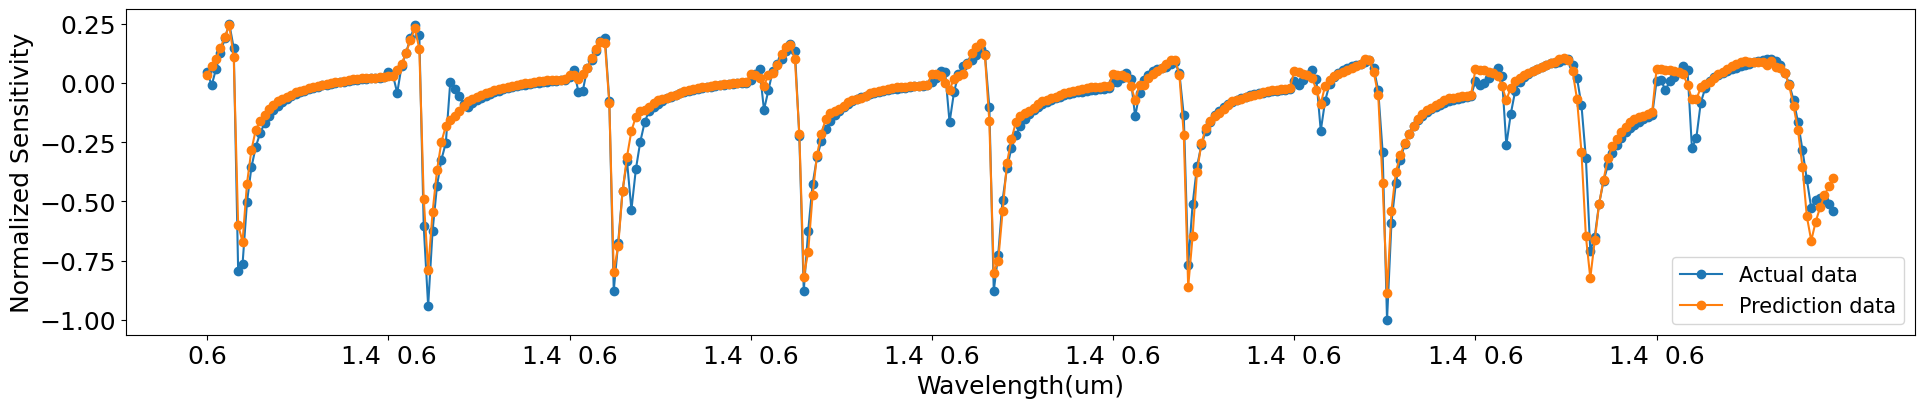

In [ ]:
new_x_labels = [0.6, '1.4  0.6' , '1.4  0.6',  '1.4  0.6', '1.4  0.6', '1.4  0.6', '1.4  0.6', '1.4  0.6', '1.4  0.6']
plt.figure(figsize=(20,5))

plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.plot(range(len(y_test['SA(1/RIU)_Q'])), y_test['SA(1/RIU)_Q'], '-o', label='Actual data')
plt.plot(range(len(y_test['SA(1/RIU)_Q'])), y_predict_test[:,1], '-o', label='Prediction data')
plt.xlabel('Wavelength(um)',fontsize=18)
plt.ylabel('Normalized Sensitivity',fontsize=18)
plt.legend(prop={'size': 15})
plt.xticks(np.arange(0, 350, step=41), new_x_labels)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout(pad=4)
plt.savefig('ii6mg sa')

12/12 [==============================] - 0s 2ms/step


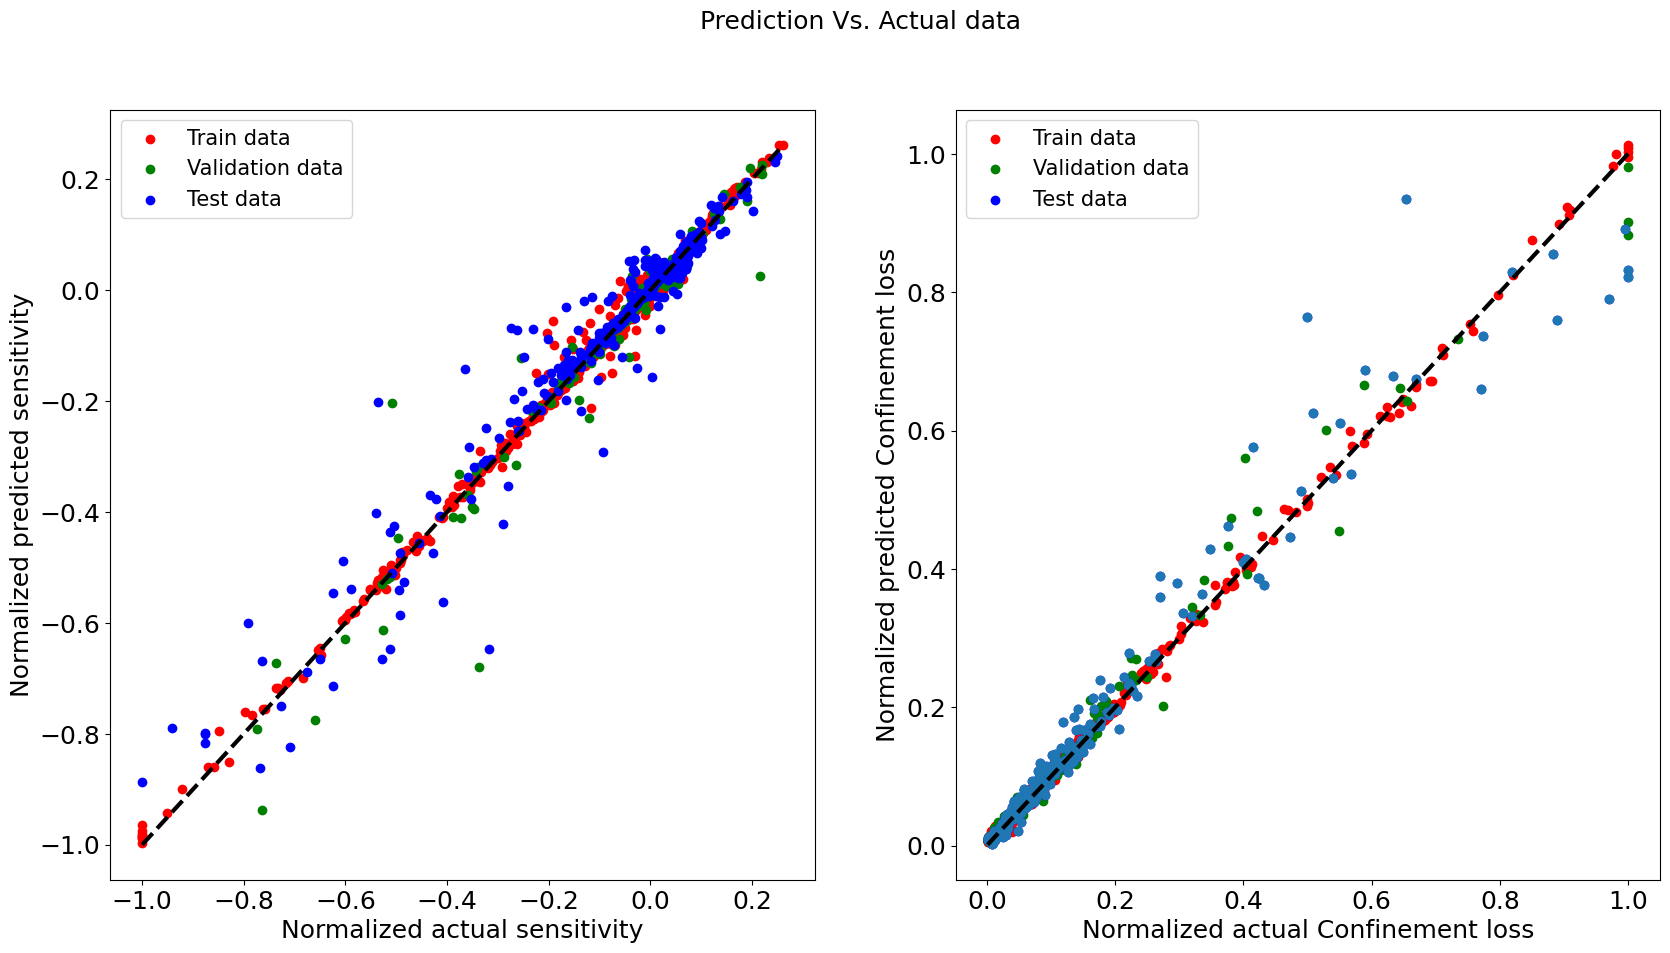

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Prediction Vs. Actual data',fontsize=18)

y_predict_train = model.predict(X_train)
y_predict_valid = model.predict(X_valid)
y_predict_test = model.predict(X_test)

ax[0].tick_params(axis="x", labelsize=18)
ax[0].tick_params(axis="y", labelsize=18)
ax[0].scatter(y_train['SA(1/RIU)_Q'], y_predict_train[:,1], label = 'Train data', color = 'red')
ax[0].scatter(y_valid['SA(1/RIU)_Q'], y_predict_valid[:,1], label = 'Validation data', color = 'green')
ax[0].scatter(y_test['SA(1/RIU)_Q'], y_predict_test[:,1], label = 'Test data', color = 'blue')

ax[0].plot([y['SA(1/RIU)_Q'].min(), y['SA(1/RIU)_Q'].max()], [y['SA(1/RIU)_Q'].min(), y['SA(1/RIU)_Q'].max()], 'k--', lw=3)
ax[0].set_xlabel('Normalized actual sensitivity',fontsize=18)
ax[0].set_ylabel('Normalized predicted sensitivity',fontsize=18)
ax[0].legend(prop={'size': 15})

ax[1].tick_params(axis="x", labelsize=18)
ax[1].tick_params(axis="y", labelsize=18)
ax[1].scatter(y_train['loss_Q'], y_predict_train[:,0], label = 'Train data', color = 'red')
ax[1].scatter(y_valid['loss_Q'], y_predict_valid[:,0], label = 'Validation data',  color = 'green')
ax[1].scatter(y_test['loss_Q'], y_predict_test[:,0], label = 'Test data', color = 'blue')

ax[1].scatter(y_test['loss_Q'], y_predict_test[:,0])
ax[1].plot([y['loss_Q'].min(), y['loss_Q'].max()], [y['loss_Q'].min(), y['loss_Q'].max()], 'k--', lw=3)
ax[1].set_xlabel('Normalized actual Confinement loss',fontsize=18)
ax[1].set_ylabel('Normalized predicted Confinement loss',fontsize=18)
ax[1].legend(prop={'size': 15})
fig.savefig('ii6mg  final sixth66   regressor .png', format='png')

# **Visualization**

In [ ]:
full_data_df = pd.DataFrame()
for key in na_data_dict.keys():
  full_data_df = full_data_df.append(na_data_dict[key])

<ipython-input-46-91ff03302d41>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data_df = full_data_df.append(na_data_dict[key])
<ipython-input-46-91ff03302d41>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data_df = full_data_df.append(na_data_dict[key])
<ipython-input-46-91ff03302d41>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data_df = full_data_df.append(na_data_dict[key])
<ipython-input-46-91ff03302d41>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data_df = full_data_df.append(na_data_dict[key])
<ipython-input-46-91ff03302d41>:3: FutureWarning: The frame.append method is deprecated and will be remo

In [ ]:
na_list

[1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39]

In [ ]:
na = na_list[0]
print('na= ', na)
data_in_specific_na = full_data_df.loc[newdf['na '] == na].copy()

na=  1.31


In [ ]:
newdf.columns

Index(['w', 'na ', 'neff', 're(neff)', 'loss', 'SA(1/RIU)', 'rg(um)',
       'loss_log', 'SA(1/RIU)_new_log', 'w^2', 'na ^2', 'rg(um)^2', 'w^3',
       'na ^3', 'rg(um)^3', 'w^4', 'na ^4', 'rg(um)^4'],
      dtype='object')

In [ ]:
x_pred = data_in_specific_na[['w', 'na ','rg(um)','w^2','na ^2','rg(um)^2','w^3','na ^3','rg(um)^3', 'w^4', 'na ^4', 'rg(um)^4']]
x_pred = (x_pred - data_mean) / data_std
y_act = data_in_specific_na[['loss_Q','SA(1/RIU)_Q']]

y_pred = model.predict(x_pred)

6/6 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'na = 1.31, various rg')

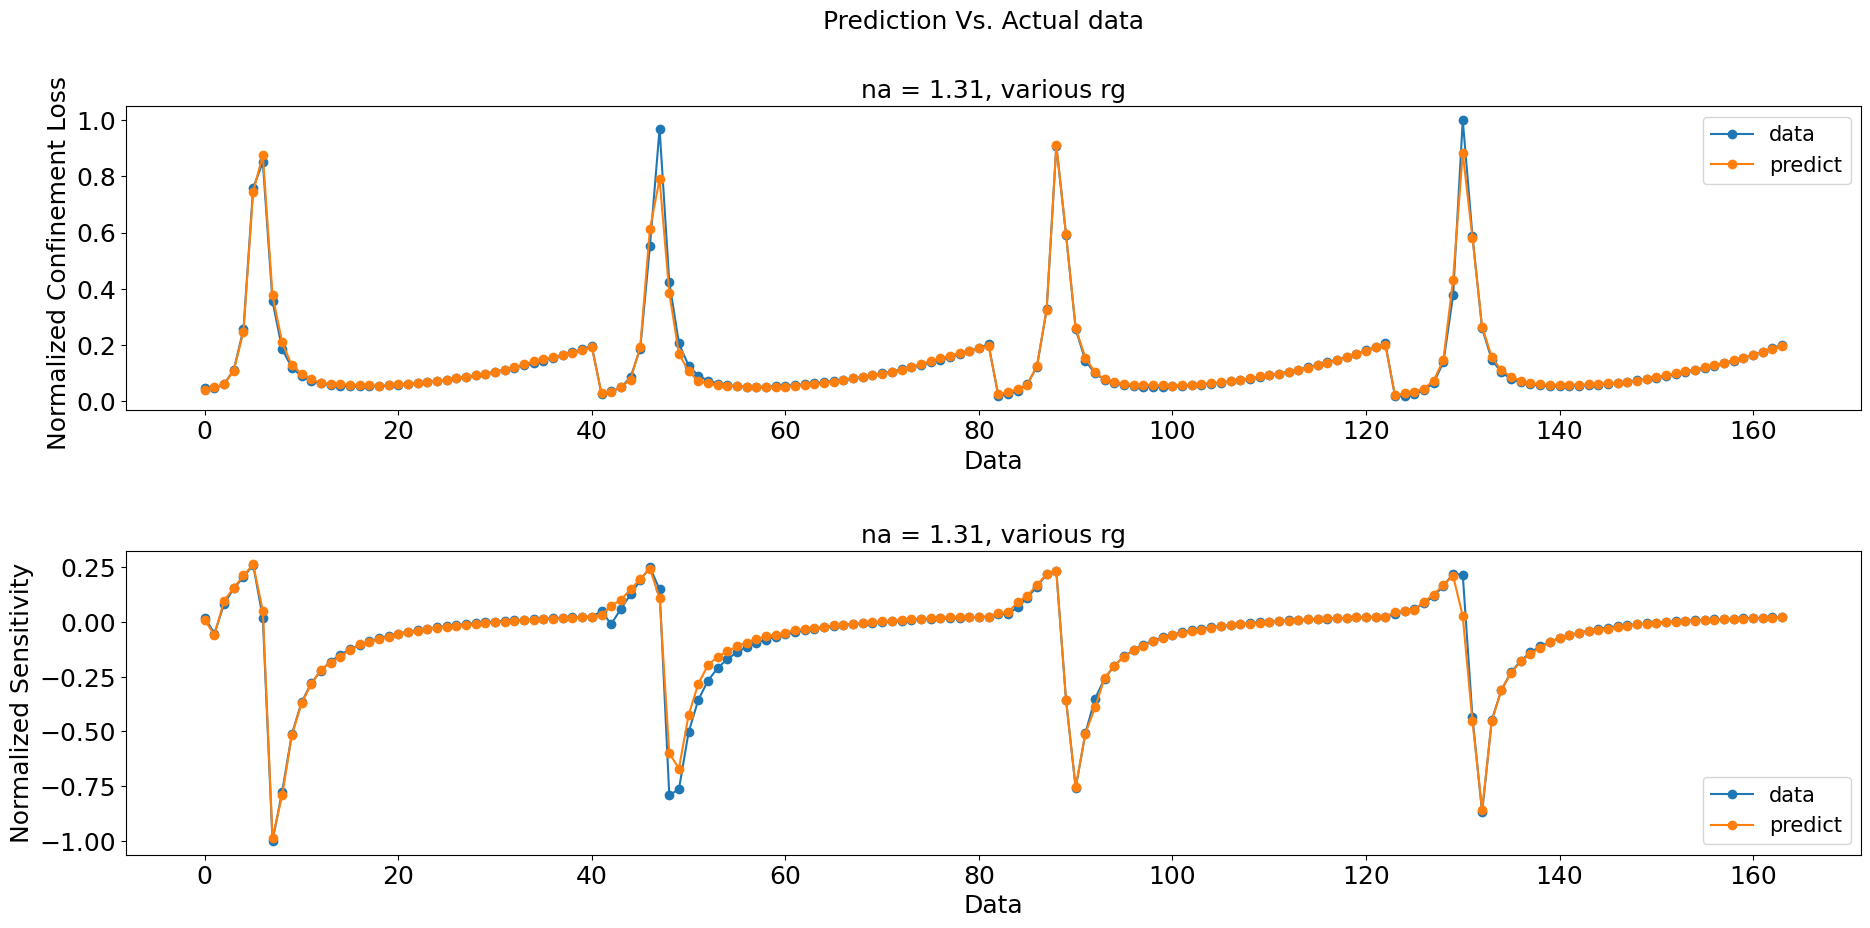

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
fig.tight_layout(pad=8.0)
fig.suptitle('Prediction Vs. Actual data',fontsize=18)

ax[0].tick_params(axis="x", labelsize=18)
ax[0].tick_params(axis="y", labelsize=18)
ax[0].plot(range(len(y_act['loss_Q'])), y_act['loss_Q'], '-o', label='data')
ax[0].plot(range(len(y_act['loss_Q'])), y_pred[:,0], '-o', label='predict')
ax[0].set_xlabel('Data',fontsize=18)
ax[0].set_ylabel('Normalized Confinement Loss ',fontsize=18)
ax[0].legend(prop={'size': 15})
ax[0].set_title('na = 1.31, various rg',fontsize=18)

ax[1].tick_params(axis="x", labelsize=18)
ax[1].tick_params(axis="y", labelsize=18)
ax[1].plot(range(len(y_act['SA(1/RIU)_Q'])), y_act['SA(1/RIU)_Q'], '-o', label='data')
ax[1].plot(range(len(y_act['SA(1/RIU)_Q'])), y_pred[:,1], '-o', label='predict')
ax[1].set_xlabel('Data',fontsize=18)
ax[1].set_ylabel('Normalized Sensitivity',fontsize=18)
ax[1].legend(prop={'size': 15})
ax[1].set_title('na = 1.31, various rg',fontsize=18)
#fig.savefig('ssixth66 comparisionRG Prediction test data split.png', format='png')

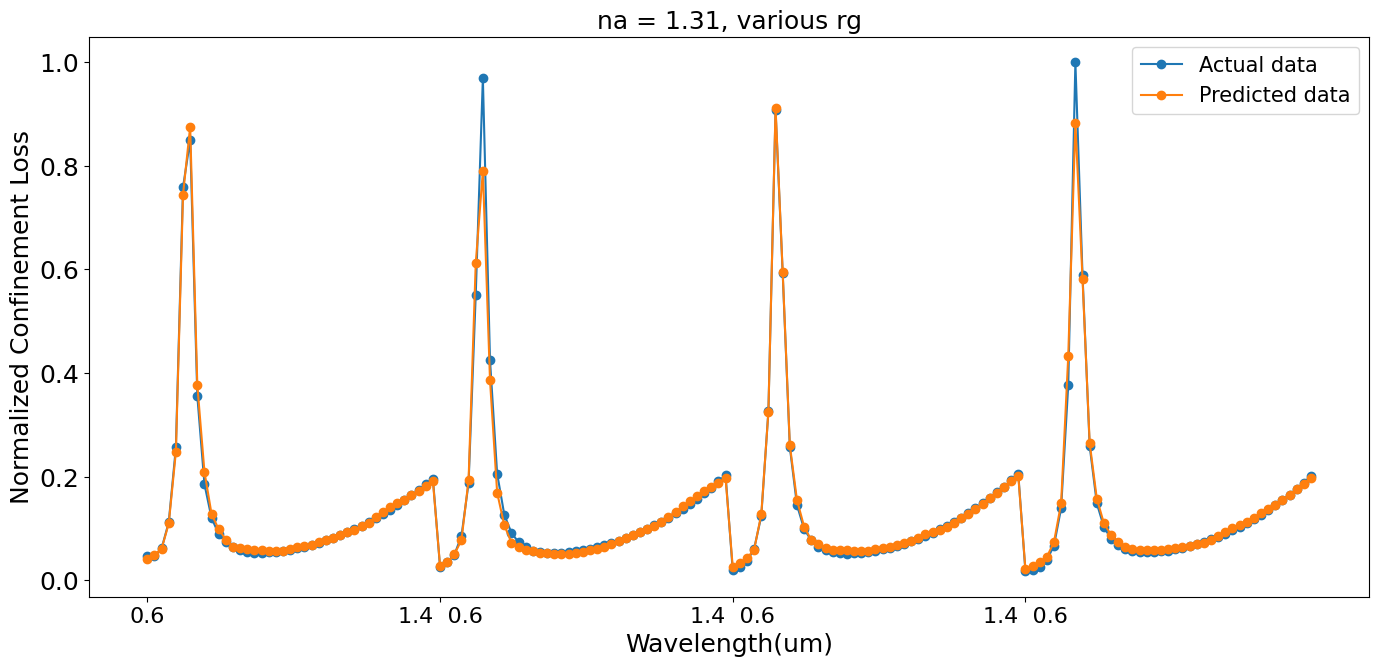

In [ ]:
four_x_labels= [0.6, '1.4  0.6' , '1.4  0.6',  '1.4  0.6']

plt.figure(figsize=(16,7))
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=18)
plt.plot(range(len(y_act['loss_Q'])), y_act['loss_Q'], '-o', label='Actual data')
plt.plot(range(len(y_act['loss_Q'])), y_pred[:,0], '-o', label='Predicted data')
plt.xlabel('Wavelength(um)',fontsize=18)
plt.ylabel('Normalized Confinement Loss',fontsize=18)
plt.legend(prop={'size': 15})
plt.xticks(np.arange(0, 160, step=41), four_x_labels)
plt.title('na = 1.31, various rg',fontsize=18)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig('ii6mg too final4 loss')

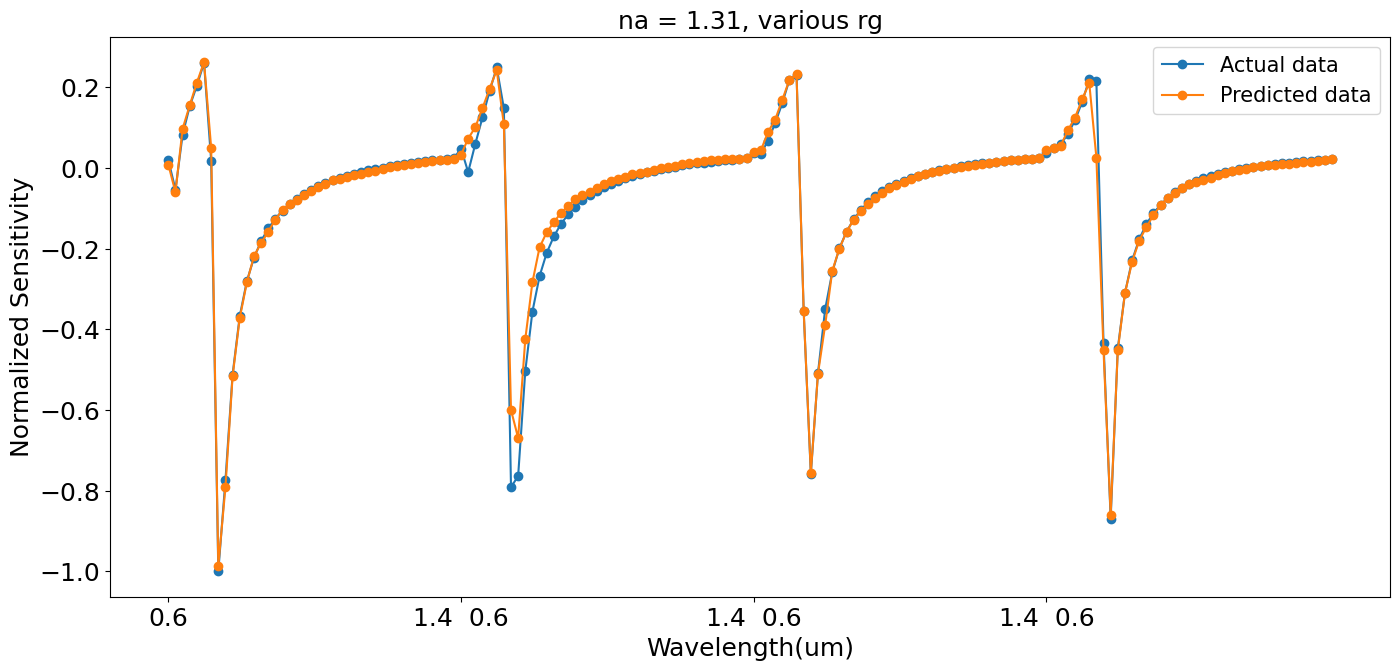

In [ ]:
plt.figure(figsize=(16,7))
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.plot(range(len(y_act['SA(1/RIU)_Q'])), y_act['SA(1/RIU)_Q'], '-o', label='Actual data')
plt.plot(range(len(y_act['SA(1/RIU)_Q'])), y_pred[:,1], '-o', label='Predicted data')
plt.xlabel('Wavelength(um)',fontsize=18)
plt.ylabel('Normalized Sensitivity',fontsize=18)
plt.legend(prop={'size': 15})
plt.xticks(np.arange(0, 160, step=41), four_x_labels)
plt.title('na = 1.31, various rg',fontsize=18)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig('ii6mg too final4 sa')